In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

## **Vectorizing the data**

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# **Building Netwotk**

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [8]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

**Training model**

In [10]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 2s 238us/step - loss: 2.3467 - acc: 0.5682 - val_loss: 1.4654 - val_acc: 0.6960
Epoch 2/20
7982/7982 [==============================] - 1s 178us/step - loss: 1.1810 - acc: 0.7503 - val_loss: 1.1479 - val_acc: 0.7440
Epoch 3/20
7982/7982 [==============================] - 1s 175us/step - loss: 0.8376 - acc: 0.8271 - val_loss: 1.0305 - val_acc: 0.7800
Epoch 4/20
7982/7982 [==============================] - 1s 171us/step - loss: 0.6152 - acc: 0.8750 - val_loss: 0.9337 - val_acc: 0.8090
Epoch 5/20
7982/7982 [==============================] - 1s 174us/step - loss: 0.4636 - acc: 0.9040 - val_loss: 0.8950 - val_acc: 0.8200
Epoch 6/20
7982/7982 [==============================] - 1s 173us/step - loss: 0.3526 - acc: 0.9268 - val_loss: 0.8751 - val_acc: 0.8180
Epoch 7/20
7982/7982 [============

# **Plotting**

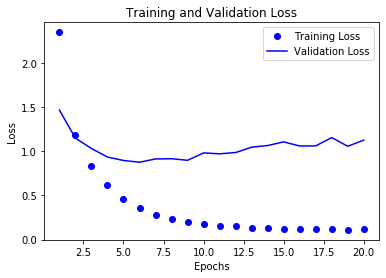

In [11]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

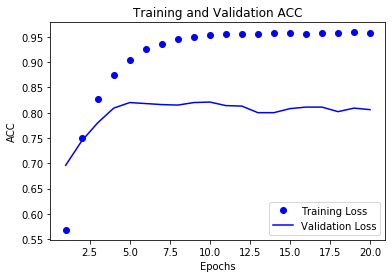

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Loss')
plt.plot(epochs, val_acc, 'b', label='Validation Loss')
plt.title('Training and Validation ACC')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()

plt.show()

# **Retraining**

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 148us/step - loss: 2.6787 - acc: 0.5153 - val_loss: 1.7407 - val_acc: 0.6480
Epoch 2/9
7982/7982 [==============================] - 1s 121us/step - loss: 1.4110 - acc: 0.7119 - val_loss: 1.2617 - val_acc: 0.7150
Epoch 3/9
7982/7982 [==============================] - 1s 121us/step - loss: 1.0148 - acc: 0.7897 - val_loss: 1.0960 - val_acc: 0.7440
Epoch 4/9
7982/7982 [==============================] - 1s 121us/step - loss: 0.7869 - acc: 0.8356 - val_loss: 1.0031 - val_acc: 0.7770
Epoch 5/9
7982/7982 [==============================] - 1s 123us/step - loss: 0.6272 - acc: 0.8702 - val_loss: 0.9385 - val_acc: 0.8060
Epoch 6/9
7982/7982 [==============================] - 1s 121us/step - loss: 0.4948 - acc: 0.8976 - val_loss: 0.9639 - val_acc: 0.7870
Epoch 7/9
7982/7982 [==============================] - 1s 120us/step - loss: 0.4033 - acc: 0.9177 - val_loss: 0.8868 - val_acc: 0.8090
Epoch 8

In [14]:
results

[0.9704810745038842, 0.7902938557700823]

**Baseline of guessing**

In [15]:
import copy

test_labels_copy = copy.deepcopy(test_labels)
np.random.shuffle(test_labels_copy)
hist_arr = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hist_arr)) / len(test_labels)

0.19011576135351738